In [1]:
import numpy as np
import pandas as pd

In [2]:
melb_df = pd.read_csv('https://raw.githubusercontent.com/zberidze/ML/main/melb_data_fe.csv', sep=',')
melb_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
0,Abbotsford,2,house,1480000.0,S,Biggin,2016-03-12,2.5,3067,2,...,144.9984,Northern Metropolitan,4019,25.20,-0.231707,3,46,5,St,1
1,Abbotsford,2,house,1035000.0,S,Biggin,2016-04-02,2.5,3067,2,...,144.9934,Northern Metropolitan,4019,15.80,-0.327660,4,116,5,St,1
2,Abbotsford,3,house,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3,...,144.9944,Northern Metropolitan,4019,18.75,0.056338,4,117,0,St,0
3,Abbotsford,3,house,850000.0,PI,Biggin,2017-04-03,2.5,3067,3,...,144.9969,Northern Metropolitan,4019,15.75,0.145455,4,47,0,other,0
4,Abbotsford,4,house,1600000.0,VB,Nelson,2016-04-06,2.5,3067,3,...,144.9941,Northern Metropolitan,4019,17.75,0.083969,4,2,2,St,0


МЕТОД GROUPBY КАК СПОСОБ ПОСТРОЕНИЯ СВОДНЫХ ТАБЛИЦ

На самом деле мы с вами уже строили простейшие одномерные сводные таблицы с помощью метода groupby — мы рассматривали сводную таблицу в контексте группировки по одному признаку. 

Например, мы уже умеем строить таблицу, которая показывает зависимость медианной цены и площади здания от числа комнат:

In [3]:
melb_df.groupby('Rooms')[['Price', 'BuildingArea']].median()

,Price,BuildingArea
Rooms,,
1,385000.0,107.0
2,690000.0,126.0
3,950000.0,126.0
4,1285000.0,142.0
5,1660000.0,176.0
6,1800000.0,126.0
7,1496000.0,216.5
8,1515000.0,126.0
10,900000.0,126.0


Также можно построить таблицу, в которой мы будем учитывать не только число комнат, но и тип здания (Type). Для этого в параметрах метода groupby() укажем список из нескольких интересующих нас столбцов.

In [4]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean()

Rooms  Type     
1      house        8.668655e+05
       townhouse    5.927045e+05
       unit         3.899289e+05
2      house        1.017238e+06
       townhouse    7.101585e+05
       unit         6.104905e+05
3      house        1.109233e+06
       townhouse    9.847087e+05
       unit         8.505963e+05
4      house        1.462283e+06
       townhouse    1.217092e+06
       unit         1.037476e+06
5      house        1.877327e+06
       townhouse    1.035000e+06
6      house        1.869508e+06
       unit         5.200000e+05
7      house        1.920700e+06
8      house        1.510286e+06
       unit         2.250000e+06
10     house        9.000000e+05
Name: Price, dtype: float64

В результате выполнения такого кода мы получаем Series, которая обладает несколькими уровнями индексов: первый уровень — число комнат, второй уровень — тип здания. Такая организация индексов называется иерархической. Вычисление параметра (средней цены) происходит во всех возможных комбинациях признаков.

Для того, чтобы финальный результат был представлен в виде сводной таблицы (первый группировочный признак по строкам, а второй — по столбцам), а не в виде Series с иерархическими индексами, к результату чаще всего применяют метод unstack(), который позволяет переопределить вложенный индекс в виде столбцов таблицы:

In [5]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean().unstack()

Type,house,townhouse,unit
Rooms,,,
1,8.668655e+05,5.927045e+05,3.899289e+05
2,1.017238e+06,7.101585e+05,6.104905e+05
3,1.109233e+06,9.847087e+05,8.505963e+05
4,1.462283e+06,1.217092e+06,1.037476e+06
5,1.877327e+06,1.035000e+06,NaN
6,1.869508e+06,NaN,5.200000e+05
7,1.920700e+06,NaN,NaN
8,1.510286e+06,NaN,2.250000e+06
10,9.000000e+05,NaN,NaN


В результате мы получаем сводную таблицу, столбцы в которой представляют типы домов (house, townhouse, unit), строки — число комнат, а на пересечении строк и столбцов находится средняя стоимость объекта с такими показателями.

Какие интересные выводы можно сделать из этой таблицы?

1
Пропуски в сводной таблице (NaN) говорят о том, что в наших данных нет соответствующих комбинаций признаков. Например, у нас нет информации о ценах на таунхаусы, где количество комнат больше пяти.

2
Наибольшей средней стоимостью (2,25 млн. австралийских долларов) обладают объекты типа unit с восемью жилыми комнатами. Наименьшая средняя стоимость — у однокомнатных домов типа unit (чуть меньше 400 тыс. австралийских долларов).

3
Сколько бы комнат ни было в доме, цена на объекты типа unit всегда ниже других (за исключением восьмикомнатных объектов).

МЕТОД PIVOT_TABLE ДЛЯ ПОСТРОЕНИЯ СВОДНЫХ ТАБЛИЦ

На самом деле метод groupby редко используется при двух параметрах, так как для построения сводных таблиц существует специальный и более простой метод — pivot_table().

Давайте построим ту же самую таблицу, но уже с использованием метода pivot_table. В качестве параметра values укажем столбец Price, в качестве индексов сводной таблицы возьмём Rooms, а в качестве столбцов — Type. Агрегирующую функцию оставим по умолчанию (среднее). Дополнительно заменим пропуски в таблице на значение 0. Финальный результат для наглядности вывода округлим с помощью метода round() до целых.

In [6]:
melb_df.pivot_table(
    values='Price',
    index='Rooms',
    columns='Type',
    fill_value=0
).round()

Type,house,townhouse,unit
Rooms,,,
1,866866.0,592705.0,389929.0
2,1017238.0,710158.0,610491.0
3,1109233.0,984709.0,850596.0
4,1462283.0,1217092.0,1037476.0
5,1877327.0,1035000.0,0.0
6,1869508.0,0.0,520000.0
7,1920700.0,0.0,0.0
8,1510286.0,0.0,2250000.0
10,900000.0,0.0,0.0


Несложно понять, что метод pivot_table() имеет преимущество перед группировкой по нескольким критериям. Оно заключается в наличии специальных аргументов для строк и столбцов сводной таблицы, благодаря чему уменьшается вероятность запутаться при построении более сложных (многомерных) сводных таблиц, о которых мы поговорим далее.

А теперь давайте проанализируем продажи в каждом из регионов в зависимости от того, будний был день или выходной. Для этого построим сводную таблицу, в которой строками будут являться названия регионов (Regionname), а в столбцах будет располагаться наш «признак-мигалка» выходного дня (Weekend), который равен 1, если день был выходным, и 0 — в противном случае. В качестве значений сводной таблицы возьмём количество продаж.

In [7]:
melb_df.pivot_table(
    values='Price',
    index='Regionname',
    columns='Weekend',
    aggfunc='count'
)

Weekend,0,1
Regionname,,
Eastern Metropolitan,447,1024
Eastern Victoria,13,40
Northern Metropolitan,1258,2632
Northern Victoria,11,30
South-Eastern Metropolitan,123,327
Southern Metropolitan,1534,3161
Western Metropolitan,960,1988
Western Victoria,8,24


Из результирующей таблицы можно сделать два вывода:

1
Число продаж резко возрастает в выходные вне зависимости от региона (приблизительно в 2-3 раза). То есть вероятность того, что дом продадут в выходные, гораздо выше вероятности, что его продадут в будний день.

2
В отдалённых регионах (Victoria) коэффициент роста числа продаж выше, чем в центральных. Если в центральных регионах Metropolitan продажи по выходным в 2-2.5 раза выше, чем по будням, то в регионах Victoria число продаж в выходные вырастает примерно в 3 раза.

Такой рост можно даже попытаться объяснить логически: в выходные дни у людей появляется свободное время, чтобы доехать до отдалённых пригородов с целью покупки дома.

Разберём ещё один пример: найдём, как зависит средняя и медианная площадь участка (Landsize) от типа объекта (Type) и его региона (Regionname). Чтобы посмотреть несколько статистических параметров, нужно передать в аргумент aggfunc список из агрегирующих функций. Построим такую сводную таблицу, где пропущенные значения заменим на 0:

In [8]:
melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)

median                        mean              \
Type                        house townhouse unit        house   townhouse   
Regionname                                                                  
Eastern Metropolitan        674.0     233.5  203   717.422847  269.440678   
Eastern Victoria            843.0       0.0  230  3108.960000    0.000000   
Northern Metropolitan       459.5     134.0    0   619.249092  317.325733   
Northern Victoria           724.0       0.0    0  3355.463415    0.000000   
South-Eastern Metropolitan  630.5     240.0  199   664.306701  212.160000   
Southern Metropolitan       586.0     246.0    0   569.643881  278.858824   
Western Metropolitan        531.0     198.0   62   507.883406  244.560669   
Western Victoria            599.5       0.0    0   655.500000    0.000000   

                                        
Type                              unit  
Regionname                              
Eastern Metropolitan        330.444444  
Eastern Victoria            295.333333  
Northern Metropolitan       495.026538  
Northern Victoria             0.000000  
South-Eastern Metropolitan  357.864865  
Southern Metropolitan       466.380245  
Western Metropolitan        557.637232  
Western Victoria              0.000000

Обратите внимание на добавление дополнительных индексов столбцов median и mean. Здесь медианное и среднее значения рассчитаны отдельно для каждой комбинации признаков.

Здесь в глаза бросаются объекты типа house в регионах Eastern Victoria и Northern Victoria — в них среднее и медиана отличаются более чем в три раза. Вероятно, это связано с тем, что в этих районах очень большой разброс цен: есть несколько объектов с гигантской площадью, а остальные объекты имеют небольшую площадь. Из-за этого среднее значение искажается, в то время как медиана нечувствительна к такому разбросу и не искажает результат.

МНОГОМЕРНЫЕ СВОДНЫЕ ТАБЛИЦЫ

До этого мы рассматривали, как некоторый статистический показатель может зависеть от двух признаков. Однако, как уже упоминалось, сводные таблицы позволяют наблюдать зависимость и от большего числа признаков. Такие сводные таблицы называются многомерными. 

Для того чтобы исследовать зависимость от большего числа признаков, можно передать список признаков в параметр index или параметр columns.

Давайте построим таблицу, в которой по индексам будут располагаться признаки метода продажи (Method) и типа объекта (Type), по столбцам — наименование региона (Regionname), а на пересечении строк и столбцов будет стоять медианная цена объекта (Price):

In [9]:
melb_df.pivot_table(
    values='Price',
    index=['Method','Type'],
    columns='Regionname',
    aggfunc='median',
    fill_value=0
)

Regionname        Eastern Metropolitan  Eastern Victoria  \
Method Type                                                
PI     house                   1244000            780000   
       townhouse                760000                 0   
       unit                     650000                 0   
S      house                   1127000            675000   
       townhouse                828000                 0   
       unit                     645750            492000   
SA     house                    932500            950000   
       townhouse                807500                 0   
       unit                          0                 0   
SP     house                   1050000            672500   
       townhouse                910000                 0   
       unit                     515000            400000   
VB     house                   1100000            712500   
       townhouse                892500                 0   
       unit                     500000                 0   

Regionname        Northern Metropolitan  Northern Victoria  \
Method Type                                                  
PI     house                     900000             500000   
       townhouse                 632500                  0   
       unit                      410000                  0   
S      house                     920000             555000   
       townhouse                 750000                  0   
       unit                      525500                  0   
SA     house                     817500             540000   
       townhouse                 425000                  0   
       unit                      616000                  0   
SP     house                     900000             521000   
       townhouse                 690000                  0   
       unit                      470000                  0   
VB     house                    1050000             690000   
       townhouse                 640000                  0   
       unit                      450000                  0   

Regionname        South-Eastern Metropolitan  Southern Metropolitan  \
Method Type                                                           
PI     house                          865000                1725000   
       townhouse                     1190000                1055000   
       unit                           525000                 571250   
S      house                          883300                1611000   
       townhouse                      875000                1135000   
       unit                           606000                 655000   
SA     house                          880000                1390000   
       townhouse                           0                1141000   
       unit                                0                 580000   
SP     house                          770000                1521750   
       townhouse                      800000                1162500   
       unit                           601000                 550000   
VB     house                          850000                1800000   
       townhouse                           0                1250000   
       unit                           700000                 500000   

Regionname        Western Metropolitan  Western Victoria  
Method Type                                               
PI     house                    870000            630000  
       townhouse                670000                 0  
       unit                     360000                 0  
S      house                    870000            397500  
       townhouse                729000                 0  
       unit                     489000                 0  
SA     house                    772500                 0  
       townhouse                467500                 0  
       unit                     571000                 0  
SP     house                    865000            360000  
       t

Первым индексом в таблице идёт метод продажи здания, далее для метода указывается тип недвижимости. По столбцам расположены регионы. В ячейках таблицы указана медианная цена для каждой такой комбинации.

Такие таблицы уже сложнее читать, однако с помощью них можно более глубоко исследовать закономерности. Например, можно видеть, что вне зависимости от метода продажи и региона цена на объекты типа house практически всегда выше, чем на объекты другого типа.

ДОСТУП К ДАННЫМ В СВОДНОЙ ТАБЛИЦЕ

?
Как получить доступ к данным или произвести фильтрацию в сложной сводной таблице, где есть дополнительные индексы?

Давайте рассмотрим, что собой представляют столбцы сложной сводной таблицы.

Запишем сводную таблицу, которую мы создавали ранее в переменную pivot:

In [10]:
pivot = melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)

In [11]:
pivot

median                        mean              \
Type                        house townhouse unit        house   townhouse   
Regionname                                                                  
Eastern Metropolitan        674.0     233.5  203   717.422847  269.440678   
Eastern Victoria            843.0       0.0  230  3108.960000    0.000000   
Northern Metropolitan       459.5     134.0    0   619.249092  317.325733   
Northern Victoria           724.0       0.0    0  3355.463415    0.000000   
South-Eastern Metropolitan  630.5     240.0  199   664.306701  212.160000   
Southern Metropolitan       586.0     246.0    0   569.643881  278.858824   
Western Metropolitan        531.0     198.0   62   507.883406  244.560669   
Western Victoria            599.5       0.0    0   655.500000    0.000000   

                                        
Type                              unit  
Regionname                              
Eastern Metropolitan        330.444444  
Eastern Victoria            295.333333  
Northern Metropolitan       495.026538  
Northern Victoria             0.000000  
South-Eastern Metropolitan  357.864865  
Southern Metropolitan       466.380245  
Western Metropolitan        557.637232  
Western Victoria              0.000000

In [12]:
pivot.columns

MultiIndex([('median',     'house'),
            ('median', 'townhouse'),
            ('median',      'unit'),
            (  'mean',     'house'),
            (  'mean', 'townhouse'),
            (  'mean',      'unit')],
           names=[None, 'Type'])

В результате мы получаем объект MultiIndex. Этот объект хранит в себе шесть комбинаций пар столбцов (два статистических параметра и три типа здания), то есть есть шесть возможных вариантов обращения к столбцам таблицы.

Мультииндексы раскрываются подобно вложенным словарям — по очереди, как матрёшка. Чтобы получить доступ к определённому столбцу, вы должны сначала обратиться к столбцу, который находится уровнем выше.

Так, из таблицы pivot мы можем получить средние значения площадей участков для типа здания unit, просто последовательно обратившись по имени столбцов:

In [13]:
display(pivot['mean']['unit'])

Regionname
Eastern Metropolitan          330.444444
Eastern Victoria              295.333333
Northern Metropolitan         495.026538
Northern Victoria               0.000000
South-Eastern Metropolitan    357.864865
Southern Metropolitan         466.380245
Western Metropolitan          557.637232
Western Victoria                0.000000
Name: unit, dtype: float64

Аналогично производится и фильтрация данных. Например, если нам нужны регионы, в которых средняя площадь здания для домов типа house меньше их медианной площади, то мы можем найти их следующим образом:

In [14]:
mask = pivot['mean']['house'] < pivot['median']['house']
filtered_pivot = pivot[mask]
display(filtered_pivot)

median                       mean              \
Type                   house townhouse unit       house   townhouse   
Regionname                                                            
Southern Metropolitan  586.0     246.0    0  569.643881  278.858824   
Western Metropolitan   531.0     198.0   62  507.883406  244.560669   

                                   
Type                         unit  
Regionname                         
Southern Metropolitan  466.380245  
Western Metropolitan   557.637232

Чтобы получить индексы отфильтрованной таблицы, можно воспользоваться атрибутом index и обернуть результат в список:



In [15]:
print(list(filtered_pivot.index))
# ['Southern Metropolitan', 'Western Metropolitan']

['Southern Metropolitan', 'Western Metropolitan']


✍ Таким образом, сводные таблицы изначально кажутся сложной структурой, но на самом деле это обычные DataFrame со вложенными индексами строк или столбцов. 

Умение читать и анализировать сложные сводные таблицы — это важный навык, который помогает проводить углублённый анализ данных.

In [16]:
import numpy as np
mser = pd.Series(
    np.random.rand(8),
	index=[['white','white','white','blue','blue','red','red','red'], 
           ['up','down','right','up','down','up','down','left']])
display(mser)

white  up       0.013204
       down     0.184652
       right    0.031802
blue   up       0.429890
       down     0.969994
red    up       0.979797
       down     0.089041
       left     0.921787
dtype: float64

В данном примере мы создаём объект Series со вложенными индексами. Мы передаём в качестве индексов Series вложенный список, где первый список задаёт внешний уровень вложенности, а второй список — внутренний уровень вложенности. Значения Series — случайные числа от 0 до 1, сгенерированные функцией np.random.rand() (ваши значения могут отличаться).

Если посмотреть на индексы Series, можно увидеть, что они являются мультииндексами:

In [17]:
print(mser.index)

MultiIndex([('white',    'up'),
            ('white',  'down'),
            ('white', 'right'),
            ( 'blue',    'up'),
            ( 'blue',  'down'),
            (  'red',    'up'),
            (  'red',  'down'),
            (  'red',  'left')],
           )


Аналогично создаются DataFrame со вложенными признаками (вложенными столбцами) — для этого вложенный список передаётся в параметр columns при инициализации таблицы:



In [18]:
mframe = pd.DataFrame(
    np.random.randn(16).reshape(4,4),
    index=[['white','white','red','red'], ['up','down','up','down']],
    columns=[['pen','pen','paper','paper'],[1,2,1,2]]
)
display(mframe)

pen               paper          
                   1         2         1         2
white up    0.687314 -0.675736 -0.725537 -0.131348
      down -1.791091 -0.970840  0.686593  0.391024
red   up   -0.660620  0.152650 -0.300204 -1.365108
      down -0.461489  0.656738  1.884720 -0.427551

Составьте сводную таблицу, которая показывает зависимость медианной площади (BuildingArea) здания от типа объекта недвижимости (Type) и количества жилых комнат в доме (Rooms). Для какой комбинации признаков площадь здания наибольшая?
В качестве ответа запишите эту комбинацию (тип здания, число комнат) через запятую, без пробелов.

In [19]:
pivot = melb_df.pivot_table(
    values='BuildingArea',
    index='Type',
    columns='Rooms',
    aggfunc='median',
    fill_value=0
)
display(pivot)

Rooms,1,2,3,4,5,6,7,8,10
Type,,,,,,,,,
house,126.0,126,126,141.0,177,126,216.5,126,126
townhouse,88.0,114,126,159.5,152,0,0.0,0,0
unit,69.5,110,126,126.0,0,171,0.0,126,0


In [20]:
pivot.index[0]

'house'

In [21]:
pivot.values.max()

216.5

In [22]:
pivot[pivot.values==216.5]

Rooms,1,2,3,4,5,6,7,8,10
Type,,,,,,,,,
house,126.0,126,126,141.0,177,126,216.5,126,126


In [23]:
pivot.index[0]

'house'

In [24]:
pivot[pivot[7] == pivot.values.max()]

Rooms,1,2,3,4,5,6,7,8,10
Type,,,,,,,,,
house,126.0,126,126,141.0,177,126,216.5,126,126


In [25]:
pivot[pivot[7] == pivot.values.max()].index[0]

'house'

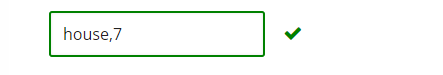

Составьте сводную таблицу, которая показывает зависимость медианной цены объекта недвижимости (Price) от риелторского агентства (SellerG) и типа здания (Type).
Во вновь созданной таблице найдите агентство, у которого медианная цена для зданий типа unit максимальна. В качестве ответа запишите название этого агентства.

In [26]:
pivot = melb_df.pivot_table(
    values='Price',
    index='SellerG',
    columns='Type',
    aggfunc='median',
)
max_unit_price = pivot['unit'].max()
print(pivot[pivot['unit'] == max_unit_price].index[0])

Nick


In [27]:
pivot[pivot['unit'] == max_unit_price]

Type,house,townhouse,unit
SellerG,,,
Nick,2025000.0,780000.0,900000.0


In [28]:
pivot

Type,house,townhouse,unit
SellerG,,,
Alexkarbon,1036250.0,935000.0,560000.0
Barry,830000.0,727500.0,502000.0
Bells,692500.0,430500.0,457500.0
Biggin,1151750.0,675000.0,548000.0
Brad,875000.0,700000.0,465000.0
Buckingham,830000.0,820000.0,553000.0
Burnham,922500.0,NaN,305000.0
Buxton,1323750.0,1030000.0,670000.0
C21,836500.0,768750.0,625500.0


In [29]:
pwd

'C:\\Users\\User\\Desktop'

In [30]:
df1=pd.read_csv('C:\\Users\\User\\Desktop\\movies_data\\dates.csv')
df3=pd.read_csv('C:\\Users\\User\\Desktop\\movies_data\\ratings2.csv')
df2=pd.read_csv('C:\\Users\\User\\Desktop\\movies_data\\movies.csv')
df4=pd.read_csv('C:\\Users\\User\\Desktop\\movies_data\\ratings1.csv')

In [31]:
df1

,date
0,2000-07-30 18:45:03
1,2000-07-30 18:20:47
2,2000-07-30 18:37:04
3,2000-07-30 19:03:35
4,2000-07-30 18:48:51
...,...
100831,2017-05-03 21:53:22
100832,2017-05-03 22:21:31
100833,2017-05-08 19:50:47
100834,2017-05-03 21:19:12


In [32]:
df2

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [33]:
df3

,userId,movieId,rating
0,274,5621,2.0
1,274,5630,3.0
2,274,5667,3.5
3,274,5679,3.5
4,274,5690,3.0
...,...,...,...
60831,610,166534,4.0
60832,610,168248,5.0
60833,610,168250,5.0
60834,610,168252,5.0


In [34]:
df4

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
39996,274,5582,2.5
39997,274,5585,3.5
39998,274,5588,3.5
39999,274,5618,4.0


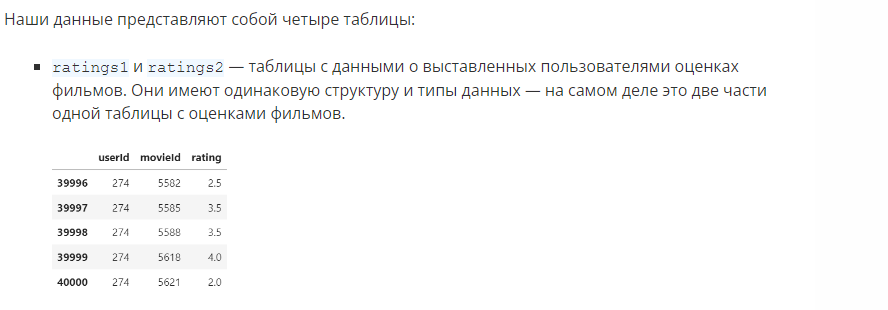

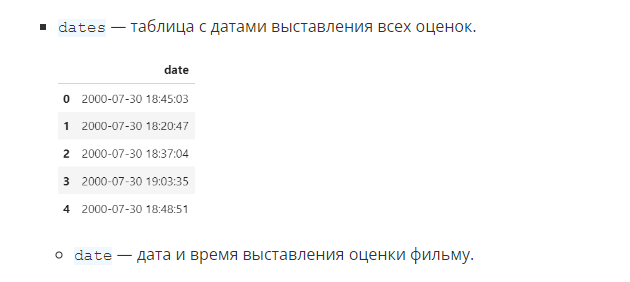

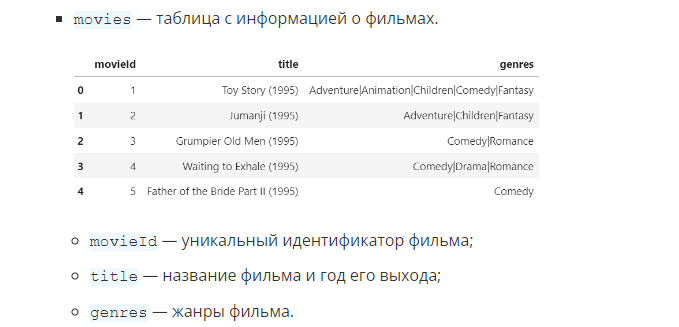

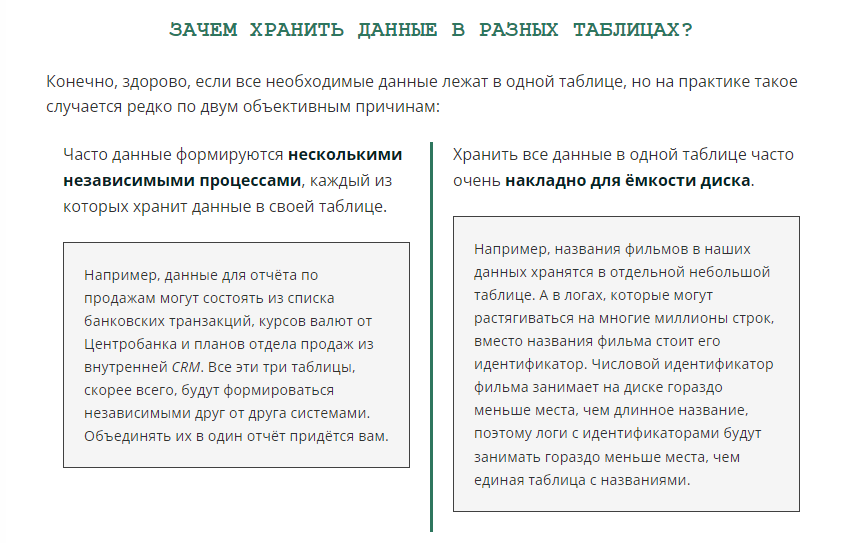

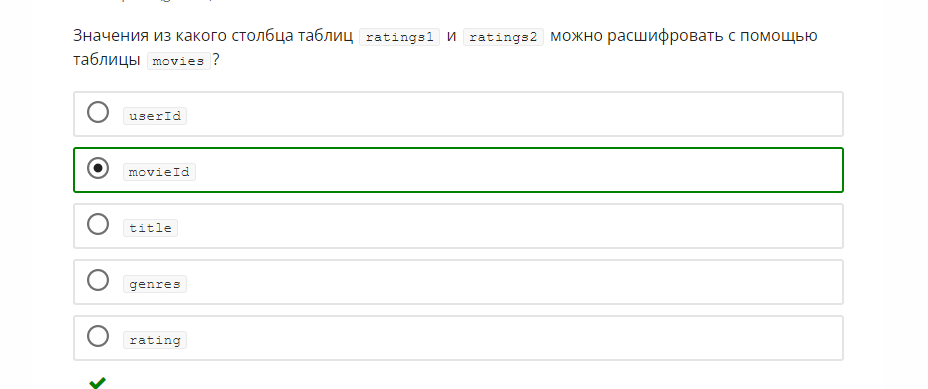

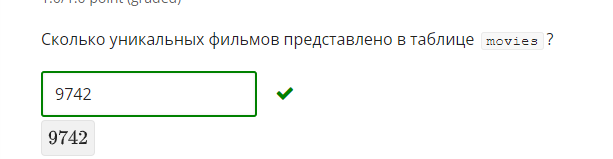

In [35]:
df2.title.unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'Flint (2017)', 'Bungo Stray Dogs: Dead Apple (2018)',
       'Andrew Dice Clay: Dice Rules (1991)'], dtype=object)

In [36]:
df2.title.nunique() 

9737

In [37]:
df1.date.value_counts()

2016-04-04 16:39:58    128
2016-04-04 16:39:57    124
2016-04-04 16:39:56     85
2016-04-04 16:39:55     37
1996-03-29 18:36:56     37
                      ... 
2016-07-04 20:53:49      1
2016-07-07 23:50:59      1
2016-07-08 00:01:44      1
2016-07-07 23:50:53      1
2017-05-03 21:20:15      1
Name: date, Length: 85043, dtype: int64

In [38]:
df1.date.dtype

dtype('O')

In [39]:
df= pd.to_datetime(df1['date'])
 
# Check the format of 'Date' column
df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 100836 entries, 0 to 100835
Series name: date
Non-Null Count   Dtype         
--------------   -----         
100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 787.9 KB


In [40]:
df.value_counts().max()

128

Для корректной конкатенации по строкам объединяемые таблицы должны иметь одинаковую структуру — идентичное число и имена столбцов.

Итак, давайте склеим  ratings1 и ratings2 по строкам, так как они имеют одинаковую структуру столбцов. Для этого передадим их списком в функцию concat(). Помним, что параметр axis по умолчанию равен 0, объединение происходит по строкам, поэтому не трогаем его. 

Примечание. Обратите внимание, что concat является функцией библиотеки, а не методом DataFrame. Поэтому её вызов осуществляется как pd.concat(...).

In [41]:
ratings = pd.concat([df3, df4])
display(ratings)

,userId,movieId,rating
0,274,5621,2.0
1,274,5630,3.0
2,274,5667,3.5
3,274,5679,3.5
4,274,5690,3.0
...,...,...,...
39996,274,5582,2.5
39997,274,5585,3.5
39998,274,5588,3.5
39999,274,5618,4.0


В результате мы увеличили первую таблицу, добавив снизу строки второй таблицы.

На первый взгляд может показаться, что всё прошло успешно, однако если мы посмотрим на индексы последних строк таблицы, то увидим, что их нумерация не совпадает с количеством строк. Это может привести к некорректному объединению таблиц по ключевым столбцам на следующем этапе решения нашей задачи.

Это связано с тем, что по умолчанию concat сохраняет первоначальные индексы объединяемых таблиц, а обе наши таблицы индексировались, начиная от 0. Чтобы создать новые индексы, нужно выставить параметр ignore_index на True:

In [42]:
ratings = pd.concat(
    [df3, df4],
    ignore_index=True
)
display(ratings)

,userId,movieId,rating
0,274,5621,2.0
1,274,5630,3.0
2,274,5667,3.5
3,274,5679,3.5
4,274,5690,3.0
...,...,...,...
100832,274,5582,2.5
100833,274,5585,3.5
100834,274,5588,3.5
100835,274,5618,4.0


Казалось бы, совсем другое дело! Но это ещё не всё. Давайте узнаем количество строк в таблицах ratings и dates, ведь нам предстоит вертикально склеить их между собой:

In [43]:
print('Число строк в таблице ratings: ', ratings.shape[0])
print('Число строк в таблице dates: ', df1.shape[0])
print(ratings.shape[0] == df3.shape[0])

Число строк в таблице ratings:  100837
Число строк в таблице dates:  100836
False


Размерность таблиц разная — как такое могло произойти?

На самом деле очень просто: при выгрузке данных информация об оценках какого-то  пользователя попала в обе таблицы (ratings1 и ratings2). В результате конкатенации случилось дублирование строк. В данном примере их легко найти — выведем последнюю строку таблицы ratings1 и первую строку таблицы ratings2:

In [44]:
display(df3.tail(1))
display(df4.head(1))

,userId,movieId,rating
60835,610,170875,3.0


,userId,movieId,rating
0,1,1,4.0


Чтобы очистить таблицу от дублей, мы можем воспользоваться методом DataFrame drop_duplicates(), который удаляет повторяющиеся строки в таблице. Не забываем обновить индексы после удаления дублей, выставив параметр ignore_index в методе drop_duplicates() на значение True:

In [45]:
ratings = ratings.drop_duplicates(ignore_index=True)
print('Число строк в таблице ratings: ', ratings.shape[0])
# Число строк в таблице ratings: 100836

Число строк в таблице ratings:  100836


Наконец, мы можем добавить к нашей таблице с оценками даты их выставления. Для этого конкатенируем таблицы ratings и dates по столбцам:

In [46]:
ratings_dates = pd.concat([ratings, df1], axis=1)
display(ratings_dates.tail(7))

,userId,movieId,rating,date
100829,274,5569,3.5,2017-05-03 21:07:11
100830,274,5573,2.5,2017-05-04 06:29:25
100831,274,5574,3.5,2017-05-03 21:53:22
100832,274,5582,2.5,2017-05-03 22:21:31
100833,274,5585,3.5,2017-05-08 19:50:47
100834,274,5588,3.5,2017-05-03 21:19:12
100835,274,5618,4.0,2017-05-03 21:20:15


✍ Итак, мы смогли создать единую таблицу с рейтингами и датами их представления. Нашим следующим шагом будет присоединить к таблице информацию о фильмах из таблицы movies.

А пока предлагаем вам потренироваться в использовании функции concat() 

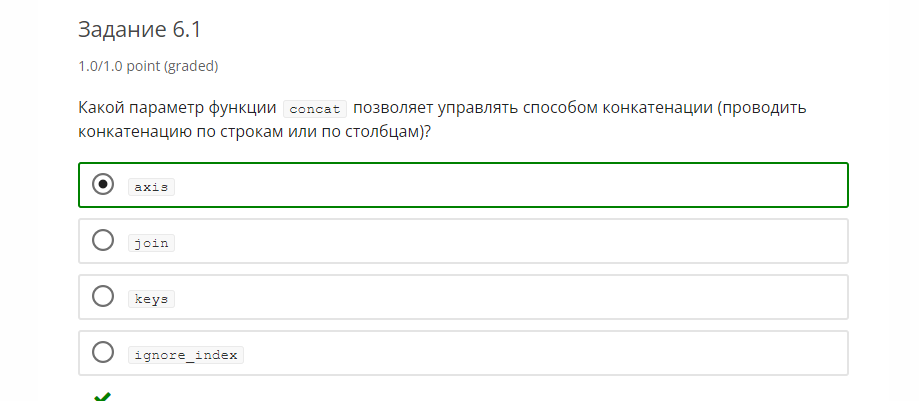

Чтобы управлять способом конкатенации таблиц, используется параметр axis. Если axis=0, конкатенация идёт по строкам, если axis=1 — по столбцам.


In [47]:
df1 = pd.DataFrame({"Name": ["Pankaj", "Lisa"], "Surname": ["Sobolev", "Krasnova"]})
df2 = pd.DataFrame({"Role": ["Admin", "Editor"]})

Заданы две таблицы — df1 и df2. В первой содержатся имена и фамилии сотрудников, во второй — их должности.
Какой из приведённых ниже способов будет верным при объединении этих таблиц?

In [48]:
df = pd.concat([df1, df2], axis=1)

In [49]:
df1


,Name,Surname
0,Pankaj,Sobolev
1,Lisa,Krasnova


In [50]:
df2

,Role
0,Admin
1,Editor


In [51]:
df

,Name,Surname,Role
0,Pankaj,Sobolev,Admin
1,Lisa,Krasnova,Editor


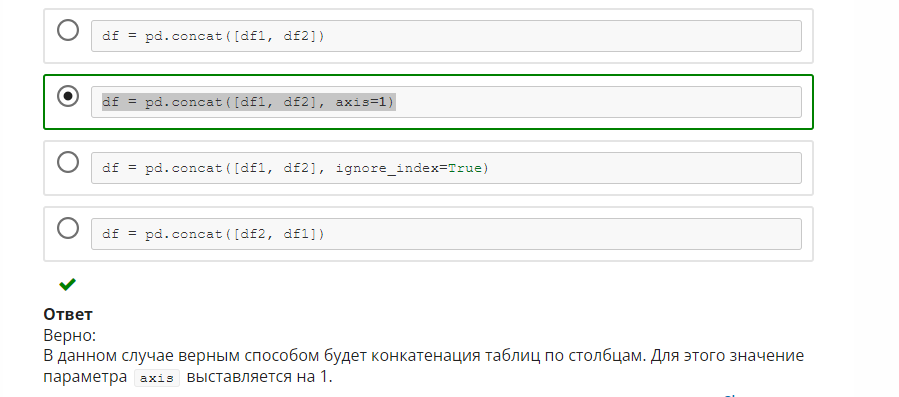

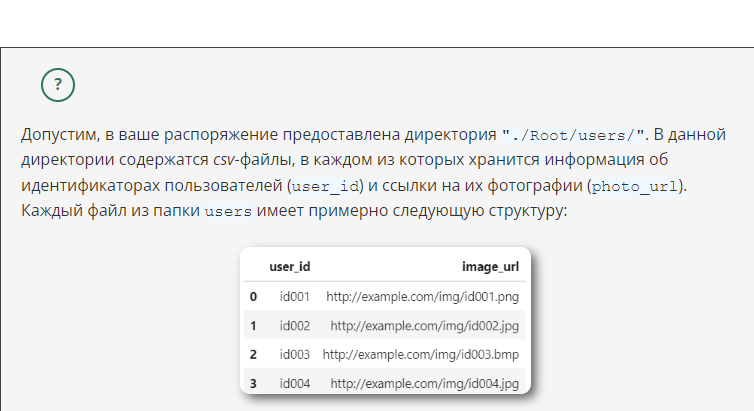

При проверке в директории может быть сколько угодно файлов (директория может изменяться в зависимости от устройства файловой системы).

Вам необходимо написать функцию concat_user_files(path), параметром которой является path — путь до директории. Функция должна объединить информацию из предоставленных вам файлов в один DataFrame и вернуть его. 

Список названий всех файлов, находящихся в директории, вы можете получить с помощью функции os.listdir(path) из модуля os (модуль уже импортирован в файле main.py). Например, для директории "./Root/users/" результатом работы функции будет список:

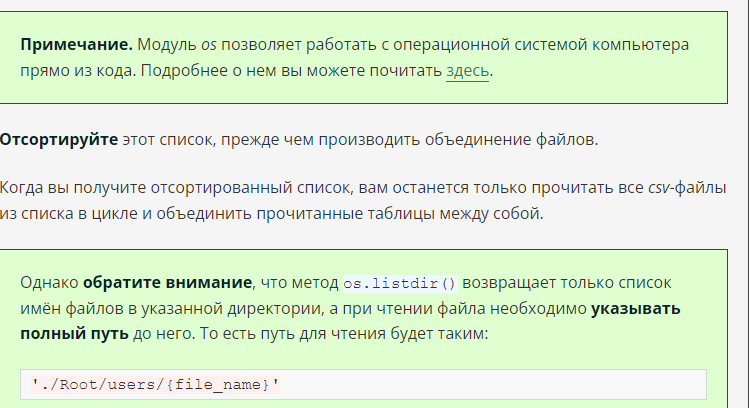

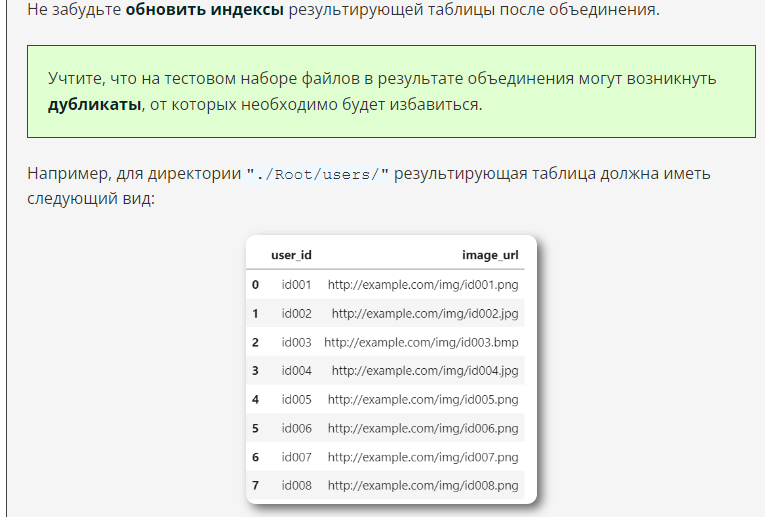

In [52]:
df1 = pd.DataFrame({"userid": ["id001", "id002","d003"],"image_url": ["http://example.com/img/id001.png", "http://example.com/img/id002png", "http://example.com/img/id003png"]})
df2 = pd.DataFrame({"userid": ["id004", "id005","d006"],"image_url": ["http://example.com/img/id004.png", "http://example.com/img/id005png", "http://example.com/img/id006png"]})

In [53]:
df3 = pd.DataFrame({"userid": ["id007", "id008"],"image_url": ["http://example.com/img/id007.png", "http://example.com/img/id008.png"]})

In [54]:
df1

,userid,image_url
0,id001,http://example.com/img/id001.png
1,id002,http://example.com/img/id002png
2,d003,http://example.com/img/id003png


In [55]:
df2

,userid,image_url
0,id004,http://example.com/img/id004.png
1,id005,http://example.com/img/id005png
2,d006,http://example.com/img/id006png


In [56]:
df3

,userid,image_url
0,id007,http://example.com/img/id007.png
1,id008,http://example.com/img/id008.png


In [57]:
pwd

'C:\\Users\\User\\Desktop'

In [58]:
path='C:\\Users\\User\\Desktop\\movies_data\\'

In [ ]:
cd C:\\Users\\User\\Desktop\\movies_data

In [ ]:
ls

In [ ]:
import os

In [62]:
list1=os.listdir(path)

In [63]:
list1

['dates.csv', 'movies.csv', 'ratings1.csv', 'ratings2.csv']

In [64]:
list1.remove("movies.csv")

In [65]:
list1

['dates.csv', 'ratings1.csv', 'ratings2.csv']

In [66]:
list1.remove("dates.csv")

In [67]:
list

list

In [68]:
path

'C:\\Users\\User\\Desktop\\movies_data\\'

In [60]:
import os
def concat_users_files(path):
    """
    Вам необходимо написать функцию concat_user_files(path), параметром которой является path - путь до директории. 
    Функция должна объединить информацию из предоставленных вам файлов в один DataFrame и вернуть его. 
    Не забудьте обновить индексы результирующей таблицы после объединения.
    Учтите тот момент, что в результате объединения могут возникнуть дубликаты, от которых необходимо будет избавиться. 
    """
    data = pd.DataFrame()
    file_names = os.listdir(path)
    file_names.sort()
    for file in file_names:
        tmp_data = pd.read_csv(path + '/' + file)
        data = pd.concat([data, tmp_data], axis=0, ignore_index=True)
    data = data.drop_duplicates()
    return data

if __name__ == '__main__':
    data = concat_users_files(path)
    print(data)

                       date   movieId title genres  userId  rating
0       2000-07-30 18:45:03       NaN   NaN    NaN     NaN     NaN
1       2000-07-30 18:20:47       NaN   NaN    NaN     NaN     NaN
2       2000-07-30 18:37:04       NaN   NaN    NaN     NaN     NaN
3       2000-07-30 19:03:35       NaN   NaN    NaN     NaN     NaN
4       2000-07-30 18:48:51       NaN   NaN    NaN     NaN     NaN
...                     ...       ...   ...    ...     ...     ...
211410                  NaN  166534.0   NaN    NaN   610.0     4.0
211411                  NaN  168248.0   NaN    NaN   610.0     5.0
211412                  NaN  168250.0   NaN    NaN   610.0     5.0
211413                  NaN  168252.0   NaN    NaN   610.0     5.0
211414                  NaN  170875.0   NaN    NaN   610.0     3.0

[195621 rows x 6 columns]


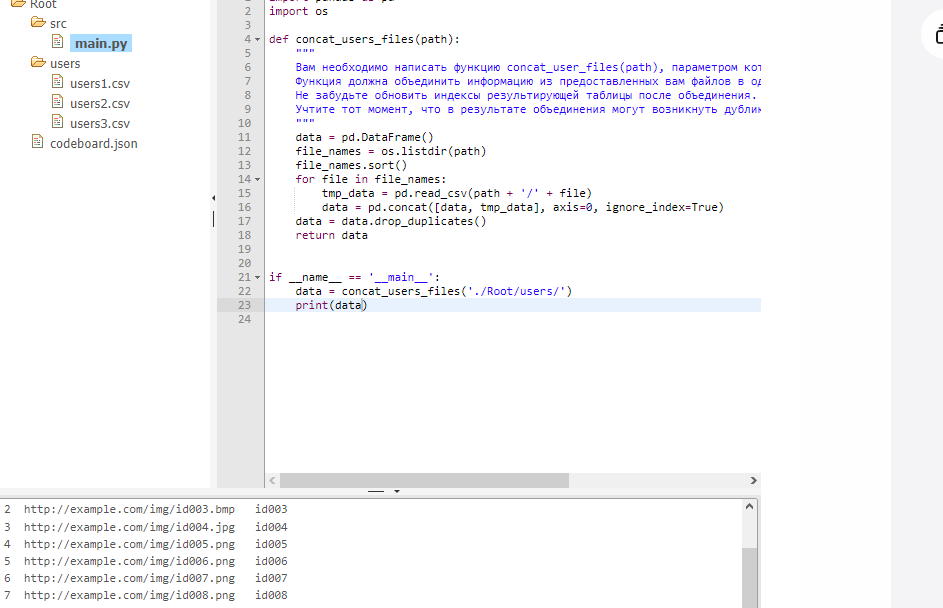

In [69]:
import os
def concat_users_files(list1):
    """
    Вам необходимо написать функцию concat_user_files(path), параметром которой является path - путь до директории. 
    Функция должна объединить информацию из предоставленных вам файлов в один DataFrame и вернуть его. 
    Не забудьте обновить индексы результирующей таблицы после объединения.
    Учтите тот момент, что в результате объединения могут возникнуть дубликаты, от которых необходимо будет избавиться. 
    """
    data = pd.DataFrame()
    file_names = list1
    file_names.sort()
    for file in file_names:
        tmp_data = pd.read_csv(path + '/' + file)
        data = pd.concat([data, tmp_data], axis=0, ignore_index=True)
    data = data.drop_duplicates()
    return data

if __name__ == '__main__':
    data = concat_users_files(list1)
    print(data)

        userId  movieId  rating
0            1        1     4.0
1            1        3     4.0
2            1        6     4.0
3            1       47     5.0
4            1       50     5.0
...        ...      ...     ...
100832     610   166534     4.0
100833     610   168248     5.0
100834     610   168250     5.0
100835     610   168252     5.0
100836     610   170875     3.0

[100836 rows x 3 columns]


У таблиц ratings и movies есть общий столбец movieId, который каждому фильму из таблицы movies ставит в соответствие поставленные ему оценки из таблицы ratings. Мы хотим объединить их в единую структуру согласно этому соответствию. Объединения такого рода часто называют объединением по ключевому столбцу.

Типы объединений в Pandas тесно связаны с операцией join из SQL, которую мы будем рассматривать в курсе в дальнейшем.

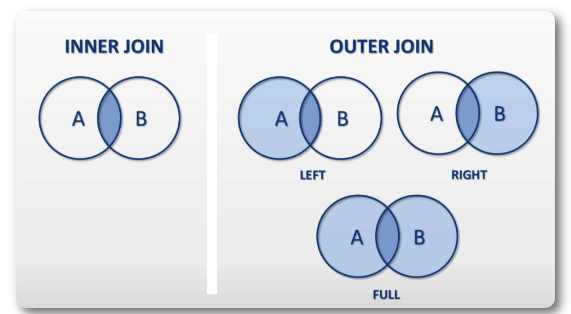

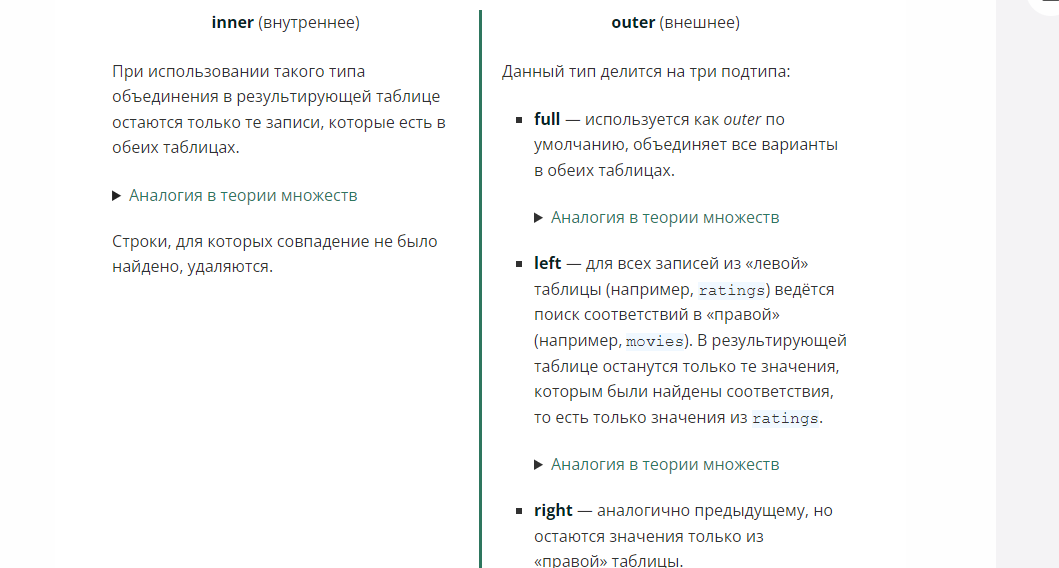

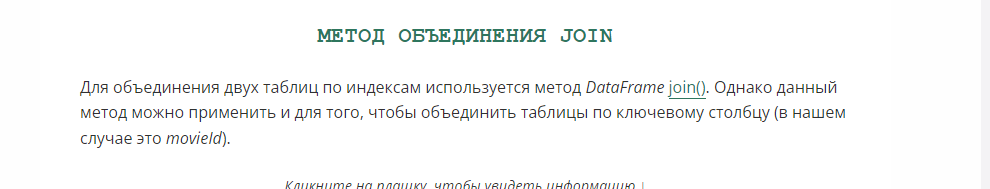

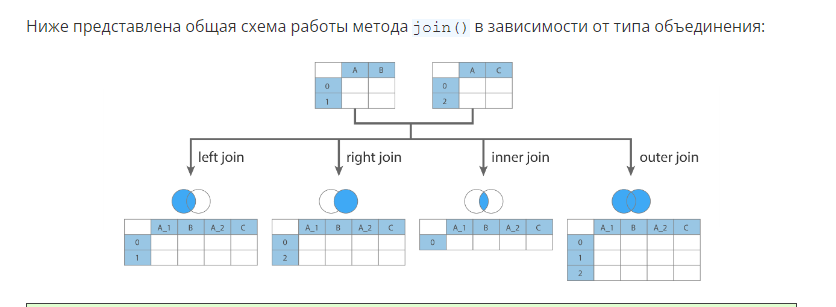

Если использовать метод join() «в лоб» (без указания ключевого столбца), то объединение произойдёт, как и задумано — по индексам двух таблиц согласно установленному типу объединения.

Проверим это, объединив таблицы типом left. Так как в наших таблицах есть одноимённые столбцы, установим один из суффиксов, чтобы избежать ошибки:

In [77]:
ratings_dates

,userId,movieId,rating,date
0,274,5621,2.0,2000-07-30 18:45:03
1,274,5630,3.0,2000-07-30 18:20:47
2,274,5667,3.5,2000-07-30 18:37:04
3,274,5679,3.5,2000-07-30 19:03:35
4,274,5690,3.0,2000-07-30 18:48:51
...,...,...,...,...
100831,274,5574,3.5,2017-05-03 21:53:22
100832,274,5582,2.5,2017-05-03 22:21:31
100833,274,5585,3.5,2017-05-08 19:50:47
100834,274,5588,3.5,2017-05-03 21:19:12


In [74]:
movies=pd.read_csv('C:\\Users\\User\\Desktop\\movies_data\\movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [75]:
joined_false = ratings_dates.join(
    movies,
    rsuffix='_right',
    how='left'
)
display(joined_false)

,userId,movieId,rating,date,movieId_right,title,genres
0,274,5621,2.0,2000-07-30 18:45:03,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,274,5630,3.0,2000-07-30 18:20:47,2.0,Jumanji (1995),Adventure|Children|Fantasy
2,274,5667,3.5,2000-07-30 18:37:04,3.0,Grumpier Old Men (1995),Comedy|Romance
3,274,5679,3.5,2000-07-30 19:03:35,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,274,5690,3.0,2000-07-30 18:48:51,5.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...,...
100831,274,5574,3.5,2017-05-03 21:53:22,NaN,NaN,NaN
100832,274,5582,2.5,2017-05-03 22:21:31,NaN,NaN,NaN
100833,274,5585,3.5,2017-05-08 19:50:47,NaN,NaN,NaN
100834,274,5588,3.5,2017-05-03 21:19:12,NaN,NaN,NaN


При объединении таблиц по индексам в результирующую таблицу попали все строки из «левой» таблицы, а недостающие строки из «правой» были заполнены пропусками. Так работает тип объединения left.

Попробуйте изменить тип объединения, чтобы посмотреть на разницу результирующих таблиц.

Обратите внимание, что в данном случае у нас получилось два столбца, соответствующих идентификатору фильма: один — из «левой» таблицы (movieId), а другой — из «правой» (movieId_right).

Однако это не тот результат, который мы хотели, ведь мы не получили соответствия фильмов и их рейтингов. Чтобы совместить таблицы по ключевому столбцу с помощью метода join(), необходимо использовать ключевой столбец в «правой» таблице в качестве индекса. Это можно сделать с помощью метода set_index(). Также необходимо указать название ключа в параметре on.

In [84]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [86]:
movies[movies['movieId']==5621]

,movieId,title,genres
3987,5621,"Tuxedo, The (2002)",Action|Comedy


In [78]:
joined = ratings_dates.join(
    movies.set_index('movieId'),
    on='movieId',
    how='left'
)
display(joined.head())

,userId,movieId,rating,date,title,genres
0,274,5621,2.0,2000-07-30 18:45:03,"Tuxedo, The (2002)",Action|Comedy
1,274,5630,3.0,2000-07-30 18:20:47,Red Dragon (2002),Crime|Mystery|Thriller
2,274,5667,3.5,2000-07-30 18:37:04,Tuck Everlasting (2002),Drama|Fantasy
3,274,5679,3.5,2000-07-30 19:03:35,"Ring, The (2002)",Horror|Mystery|Thriller
4,274,5690,3.0,2000-07-30 18:48:51,Grave of the Fireflies (Hotaru no haka) (1988),Animation|Drama|War


В результате такого объединения для каждого идентификатора фильма movieId в таблице ratings_dates найден совпадающий с ним идентификатор movieId в таблице movies и присоединена информация о самом фильме (title и genres). Это как раз то, что нам нужно.

Обратите внимание, что в результате такого объединения остался лишь один столбец movieId.

ЕТОД ОБЪЕДИНЕНИЯ MERGE

Аналогично предыдущему, метод merge() предназначен для слияния двух таблиц по ключевым столбцам или по индексам. Однако, в отличие от join(), метод merge() предлагает более гибкий способ управления объединением, благодаря чему является более популярным.

→ Метод merge() в первую очередь предназначен для слияния таблиц по заданным ключам, поэтому он не требует установки ключевых столбцов в качестве индекса присоединяемой таблицы. Кроме того, данный метод позволяет объединять даже таблицы с разноимёнными ключами. Таким образом, merge() проще в использовании и более многофункционален, чем схожие методы.

Посмотрим на метод merge() в действии. Произведём слияние наших таблиц и получим ту же таблицу, что и ранее:

In [87]:
merged = ratings_dates.merge(
    movies,
    on='movieId',
    how='left'
)
display(merged.head())

,userId,movieId,rating,date,title,genres
0,274,5621,2.0,2000-07-30 18:45:03,"Tuxedo, The (2002)",Action|Comedy
1,274,5630,3.0,2000-07-30 18:20:47,Red Dragon (2002),Crime|Mystery|Thriller
2,274,5667,3.5,2000-07-30 18:37:04,Tuck Everlasting (2002),Drama|Fantasy
3,274,5679,3.5,2000-07-30 19:03:35,"Ring, The (2002)",Horror|Mystery|Thriller
4,274,5690,3.0,2000-07-30 18:48:51,Grave of the Fireflies (Hotaru no haka) (1988),Animation|Drama|War


Проверим, что число строк в таблице ratings_dates совпадает с числом строк в результирующей таблице merged:

In [88]:
print('Число строк в таблице ratings_dates: ', ratings_dates.shape[0])
print('Число строк в таблице merged: ', merged.shape[0])
print(ratings_dates.shape[0] == merged.shape[0])


Число строк в таблице ratings_dates:  100836
Число строк в таблице merged:  100836
True


Всё прошло успешно: для каждой оценки пользователя мы нашли информацию о фильме, которому она была выставлена.

ОСОБЕННОСТИ ИСПОЛЬЗОВАНИЯ MERGE()

?
Возникает вопрос: почему мы выбрали тип объединения left, а не full, например?

Найти ответ нам поможет пример. Объединим ratings_dates с movies по ключевому столбцу movieId, но с параметром how='outer' (full outer) и выведем размер таблицы, а также её «хвост»:

In [89]:
merged2 = ratings_dates.merge(
    movies,
    on='movieId',
    how='outer'
)
print('Число строк в таблице merged2: ', merged2.shape[0])
display(merged2.tail())

Число строк в таблице merged2:  100854


,userId,movieId,rating,date,title,genres
100849,NaN,30892,NaN,NaN,In the Realms of the Unreal (2004),Animation|Documentary
100850,NaN,32160,NaN,NaN,Twentieth Century (1934),Comedy
100851,NaN,32371,NaN,NaN,Call Northside 777 (1948),Crime|Drama|Film-Noir
100852,NaN,34482,NaN,NaN,"Browning Version, The (1951)",Drama
100853,NaN,85565,NaN,NaN,Chalet Girl (2011),Comedy|Romance


Результирующее число строк в таблице увеличилось. Но за счёт чего?

Оказывается, в таблице movies содержались фильмы, которым ещё не были выставлены оценки. В результате объединения типом full outer информация о фильмах перенеслась из таблицы movies в результирующую таблицу. Однако, поскольку оценки фильмам ещё не были выставлены, соответствующие столбцы таблицы ratings_dates заполнились пропусками (NaN). Такие фильмы были записаны в конец таблицы.

Важно! Учитывайте такие нюансы при работе с несколькими таблицами и всегда проверяйте результат объединения.

 Метод merge() с внешним (outer) типом объединения может использоваться как аналог метода concat() при объединении таблиц с одинаковой структурой (одинаковые количество и названия столбцов) по строкам. В таком случае все одноимённые столбцы таблиц будут считаться ключевыми.

In [93]:
ratings2=pd.read_csv('C:\\Users\\User\\Desktop\\movies_data\\ratings2.csv')

ratings1=pd.read_csv('C:\\Users\\User\\Desktop\\movies_data\\ratings1.csv')

In [94]:
merge_ratings = ratings1.merge(ratings2, how='outer')
print('Число строк в таблице merge_ratings: ', merge_ratings.shape[0])
display(merge_ratings)

Число строк в таблице merge_ratings:  100836


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


Обратите внимание, что при использовании метода merge() для склейки двух таблиц у нас автоматически пропали дубликаты, которые мы видели при использовании метода concat(). Это особенность метода merge() — автоматическое удаление дублей.

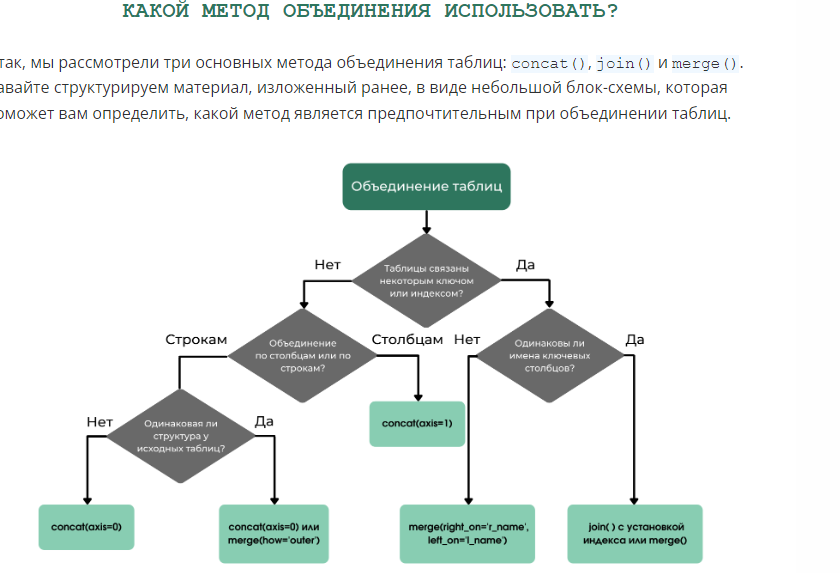

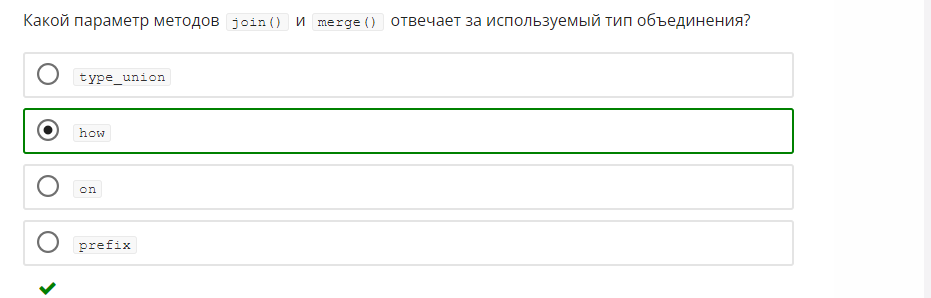

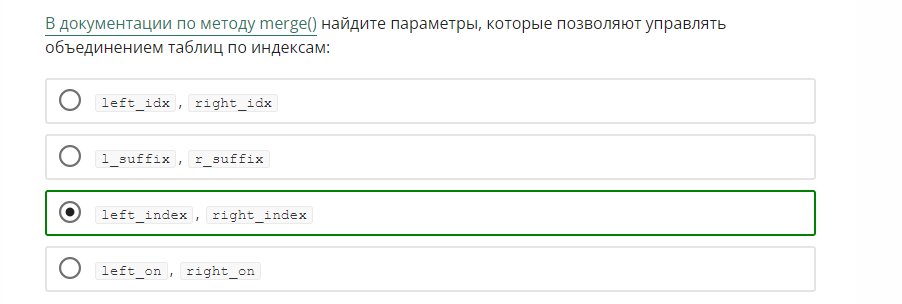

In [95]:
data_1 = pd.DataFrame({'Value': [100, 45, 80],
                       'Group': [1, 4, 5]},
                      index = ['I0', 'I1', 'I2']
                     )

In [97]:
data_2 = pd.DataFrame({'Company': ['Google', 'Amazon', 'Facebook'],
                       'Add': ['S0', 'S1', 'S7']},
                      index = ['I0', 'I1', 'I3'])

In [98]:
data_1

,Value,Group
I0,100,1
I1,45,4
I2,80,5


In [99]:
data_2

,Company,Add
I0,Google,S0
I1,Amazon,S1
I3,Facebook,S7


Какой из перечисленных вариантов кода позволяет получить представленный ниже результат?

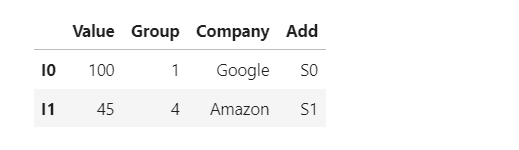

In [100]:
data_1.join(data_2, how='inner')

,Value,Group,Company,Add
I0,100,1,Google,S0
I1,45,4,Amazon,S1


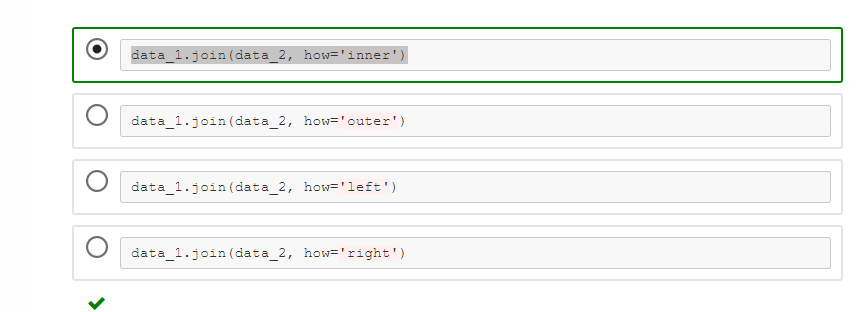

In [101]:
a = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': [103, 214, 124], 'C': [1, 4, 2]})

In [102]:
b = pd.DataFrame({'V': ['d', 'b', 'c'], 'U': [1393.7, 9382.2, 1904.5], 'C': [1, 3, 2]})

In [104]:
a

,A,B,C
0,a,103,1
1,b,214,4
2,c,124,2


In [105]:
b

,V,U,C
0,d,1393.7,1
1,b,9382.2,3
2,c,1904.5,2


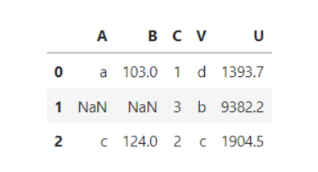

In [103]:
a.merge(b, how='right', on='C')

,A,B,C,V,U
0,a,103.0,1,d,1393.7
1,NaN,NaN,3,b,9382.2
2,c,124.0,2,c,1904.5


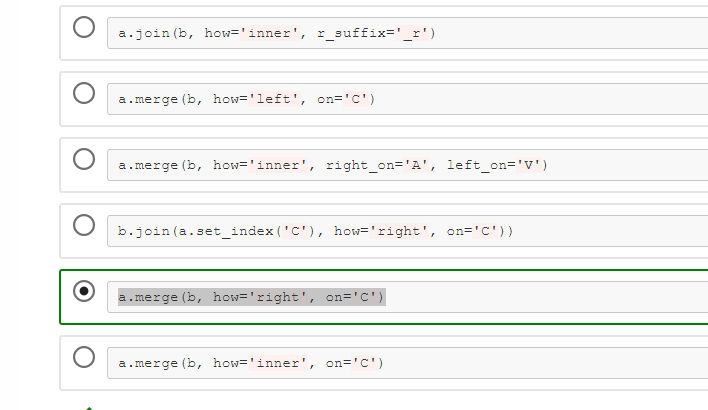

In [106]:
items_df = pd.DataFrame({
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 100132, 312394], 
    'vendor': ['Samsung', 'LG', 'Apple', 'Apple', 'LG', 'Apple', 'Samsung', 'Samsung', 'LG', 'ZTE'],
    'stock_count': [54, 33, 122, 18, 102, 43, 77, 143, 60, 19]
})

In [107]:
purchase_df = pd.DataFrame({
    'purchase_id': [101, 101, 101, 112, 121, 145, 145, 145, 145, 221],
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 103845, 100132], 
    'price': [13900, 5330, 38200, 49990, 9890, 33000, 67500, 34500, 89900, 11400]
})

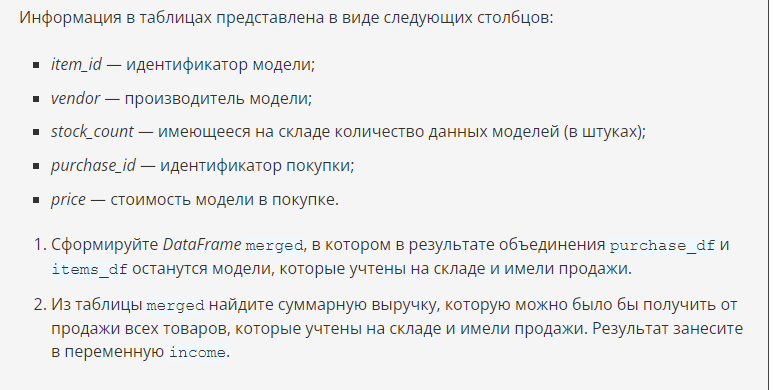

In [108]:
items_df

,item_id,vendor,stock_count
0,417283,Samsung,54
1,849734,LG,33
2,132223,Apple,122
3,573943,Apple,18
4,19475,LG,102
5,3294095,Apple,43
6,382043,Samsung,77
7,302948,Samsung,143
8,100132,LG,60
9,312394,ZTE,19


In [109]:
purchase_df

,purchase_id,item_id,price
0,101,417283,13900
1,101,849734,5330
2,101,132223,38200
3,112,573943,49990
4,121,19475,9890
5,145,3294095,33000
6,145,382043,67500
7,145,302948,34500
8,145,103845,89900
9,221,100132,11400


In [110]:
merged =items_df.merge(purchase_df, how='inner', on='item_id')

In [111]:
merged #103845 id

,item_id,vendor,stock_count,purchase_id,price
0,417283,Samsung,54,101,13900
1,849734,LG,33,101,5330
2,132223,Apple,122,101,38200
3,573943,Apple,18,112,49990
4,19475,LG,102,121,9890
5,3294095,Apple,43,145,33000
6,382043,Samsung,77,145,67500
7,302948,Samsung,143,145,34500
8,100132,LG,60,221,11400


In [113]:
income =(merged['price'] * merged['stock_count']).sum()
income

19729490

In [115]:
pwd

'C:\\Users\\User\\Desktop'

Из модуля re нам понадобится только функция findall(), которая позволяет найти в строке все слова, удовлетворяющие шаблону. Мы находим в строке с названием фильма шаблон "(DDDD)" — четыре цифры, обёрнутых в скобки, что соответствует году выпуска фильма. Если такого шаблона не было найдено (год выпуска не указан), функция возвращает None (в таблице это будет помечено как пропуск).

In [118]:
joined=pd.read_csv("C:\\Users\\User\\Desktop\\ratings_movies.csv")

In [119]:
joined

,Unnamed: 0,userId,movieId,rating,date,title,genres
0,0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...,...
100831,100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller
100832,100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror
100834,100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi


In [120]:
#библиотека для регулярных выражений
import re 
def get_year_release(arg):
    #находим все слова по шаблону "(DDDD)"
    candidates = re.findall(r'\(\d{4}\)', arg) 
    # проверяем число вхождений
    if len(candidates) > 0:
        #если число вхождений больше 0,
        #очищаем строку от знаков "(" и ")"
        year = candidates[0].replace('(', '')
        year = year.replace(')', '')
        return int(year)
    else:
        #если год не указан, возвращаем None
        return None

In [121]:
joined['year_release'] = joined['title'].apply(get_year_release)
joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    100836 non-null  int64  
 1   userId        100836 non-null  int64  
 2   movieId       100836 non-null  int64  
 3   rating        100836 non-null  float64
 4   date          100836 non-null  object 
 5   title         100836 non-null  object 
 6   genres        100836 non-null  object 
 7   year_release  100818 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 6.2+ MB


Создайте в таблице новый признак year_release, который соответствует году выпуска фильма.
У скольких фильмов не указан год их выпуска?

18

Какой фильм, выпущенный в 1999 году, получил наименьшую среднюю оценку зрителей?
В качестве ответа запишите название этого фильма без указания года его выпуска.

In [122]:
mask = joined['year_release'] == 1999
joined[mask].groupby('title')['rating'].mean().sort_values()

title
Bloodsport: The Dark Kumite (1999)            0.5
Simon Sez (1999)                              1.0
Chill Factor (1999)                           1.0
Source, The (1999)                            1.0
Trippin' (1999)                               1.0
                                             ... 
Trailer Park Boys (1999)                      5.0
Larry David: Curb Your Enthusiasm (1999)      5.0
Sun Alley (Sonnenallee) (1999)                5.0
George Carlin: You Are All Diseased (1999)    5.0
Five Senses, The (1999)                       5.0
Name: rating, Length: 261, dtype: float64

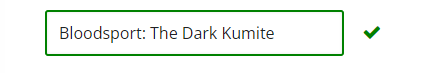

Какое сочетание жанров фильмов (genres), выпущенных в 2010 году, получило наименьшую среднюю оценку (rating)?
Запишите сочетание так же, как оно указано в таблице (через разделитель |, без пробелов).

In [123]:
mask = joined['year_release'] == 2010
joined[mask].groupby('genres')['rating'].mean().sort_values()

genres
Action|Sci-Fi                        1.000000
Action|Adventure|Horror              1.500000
Action|Drama|Fantasy                 1.500000
Crime|Romance                        1.500000
Adventure|Comedy|Fantasy             1.833333
                                       ...   
Crime                                4.750000
Comedy|Musical                       5.000000
Animation|Drama|Fantasy|Mystery      5.000000
Adventure|Children|Comedy|Mystery    5.000000
Animation|Children|Mystery           5.000000
Name: rating, Length: 119, dtype: float64

In [124]:
joined[mask]

,Unnamed: 0,userId,movieId,rating,date,title,genres,year_release
244,244,2,74458,4.0,2015-10-24 19:28:46,Shutter Island (2010),Drama|Mystery|Thriller,2010.0
245,245,2,77455,3.0,2015-10-24 19:29:01,Exit Through the Gift Shop (2010),Comedy|Documentary,2010.0
246,246,2,79132,4.0,2015-10-24 19:27:21,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,2010.0
247,247,2,80489,4.5,2015-10-24 19:35:40,"Town, The (2010)",Crime|Drama|Thriller,2010.0
248,248,2,80906,5.0,2015-10-24 19:32:52,Inside Job (2010),Documentary,2010.0
...,...,...,...,...,...,...,...,...
100521,100521,610,89028,3.5,2017-05-03 21:56:46,Don't Be Afraid of the Dark (2010),Horror|Thriller,2010.0
100522,100522,610,89072,4.0,2017-05-03 21:55:45,Stake Land (2010),Horror,2010.0
100524,100524,610,89281,3.5,2017-05-03 22:02:14,Birdemic: Shock and Terror (2010),Romance|Thriller,2010.0
100525,100525,610,89582,4.5,2016-11-19 08:50:03,Cold Fish (Tsumetai nettaigyo) (2010),Drama|Thriller,2010.0


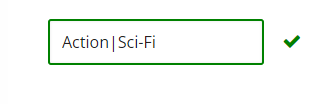

Какой пользователь (userId) посмотрел наибольшее количество различных (уникальных) комбинаций жанров (genres) фильмов? В качестве ответа запишите идентификатор этого пользователя.

In [125]:
joined.groupby('userId')['genres'].nunique().sort_values(ascending=False)

userId
599    524
414    482
448    403
380    399
474    395
      ... 
578     15
12      15
85      13
214     13
245     13
Name: genres, Length: 610, dtype: int64

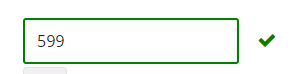

Найдите пользователя, который выставил наименьшее количество оценок, но его средняя оценка фильмам наибольшая.
В качестве ответа укажите идентификатор этого пользователя.
Чтобы рассчитать несколько параметров для каждого пользователя (количество оценок и среднюю оценку), можно воспользоваться методом agg() на сгруппированных данных.

In [126]:
joined.groupby('userId')['rating'].agg(
    ['count', 'mean']
).sort_values(['count', 'mean'], ascending=[True, False])

,count,mean
userId,,
53,20,5.000000
595,20,4.200000
189,20,4.100000
569,20,4.000000
278,20,3.875000
...,...,...
274,1346,3.235884
448,1864,2.847371
474,2108,3.398956


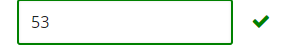

Найдите сочетание жанров (genres) за 2018 году, которое имеет наибольший средний рейтинг (среднее по столбцу rating), и при этом число выставленных ему оценок (количество значений в столбце rating) больше 10.
Запишите сочетание так же, как оно указано в таблице (через разделитель |, без пробелов).

In [127]:
mask = joined['year_release'] == 2018
grouped = joined[mask].groupby('genres')['rating'].agg(
    ['mean', 'count']
)
grouped[grouped['count']>10].sort_values(
    by='mean',
    ascending=False
)

,mean,count
genres,,
Action|Adventure|Sci-Fi,3.928571,14
Action|Comedy|Sci-Fi,3.875000,12


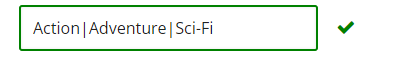

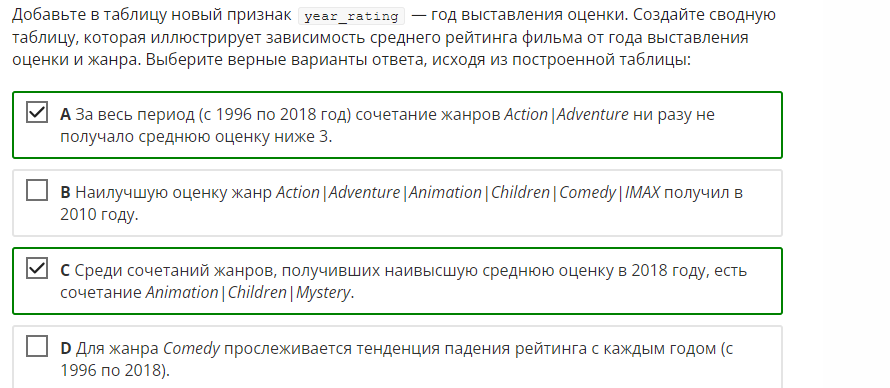

Ответ
Верно:
A Если посмотреть оценки жанра Action|Adventure, обратившись к сводной таблице по этому столбцу, оценок ниже 3 не оказывается.
C Если обратиться к сводной таблице по индексу 2018 года и отсортировать результат по убыванию, то среди жанров, получивших наивысшую оценку, можно найти сочетание Animation|Children|Mystery.

In [128]:
joined['date'] = pd.to_datetime(joined['date'])
joined['year_rating'] = joined['date'].dt.year
pivot = joined.pivot_table(
    index='year_rating',
    columns='genres',
    values='rating',
    aggfunc='mean'
)
display(pivot)

genres,(no genres listed),Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children,Action|Adventure|Animation|Children|Comedy,Action|Adventure|Animation|Children|Comedy|Fantasy,Action|Adventure|Animation|Children|Comedy|IMAX,Action|Adventure|Animation|Children|Comedy|Romance,Action|Adventure|Animation|Children|Comedy|Sci-Fi,...,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|IMAX,Sci-Fi|Thriller,Sci-Fi|Thriller|IMAX,Thriller,War,Western
year_rating,,,,,,,,,,,,,,,,,,,,,
1996,NaN,2.730769,3.454545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.666667,NaN,3.838095,NaN,3.117647
1997,NaN,3.538462,4.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.400000,NaN,3.923077,NaN,3.000000
1998,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.800000,NaN,NaN
1999,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000,NaN,NaN,NaN,NaN,4.000000,NaN,3.700000,4.5,4.000000
2000,NaN,2.588235,3.738462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000,NaN,3.0,3.416667,NaN,2.142857,NaN,3.087912,3.0,4.058824
2001,NaN,3.000000,3.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,2.500000,NaN,2.500000,NaN,3.477273,3.0,3.111111
2002,NaN,2.750000,4.304348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000,NaN,NaN,3.750000,NaN,3.600000,NaN,3.583333,3.5,3.000000
2003,NaN,3.833333,3.277778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.375,2.5,NaN,2.333333,NaN,3.142857,NaN,3.250000,3.0,4.000000
2004,NaN,2.700000,4.136364,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,...,3.000,3.0,3.5,2.125000,NaN,NaN,NaN,3.464286,3.0,3.800000


In [138]:
orders=pd.read_csv("C:\\Users\\User\\Desktop\\orders.csv",sep=";")
products=pd.read_csv("C:\\Users\\User\\Desktop\\products.csv",sep=";")

In [139]:
orders

,Дата создания,Order ID,ID Покупателя,Статус,Оплачен,Отменен,Отгружен,ID товара,Количество
0,09.11.2019 21:55:51,9,10,"Принят, ожидается оплата",Нет,Нет,Нет,103,5
1,09.11.2019 15:05:57,8,9,"Принят, ожидается оплата",Нет,Нет,Нет,86,100
2,09.11.2019 15:05:57,8,9,"Принят, ожидается оплата",Нет,Нет,Нет,104,10
3,09.11.2019 12:50:07,7,8,"Принят, ожидается оплата",Нет,Нет,Нет,104,7
4,09.11.2019 12:00:00,6,1,"Принят, ожидается оплата",Нет,Нет,Нет,104,5
5,09.11.2019 12:00:00,6,1,"Принят, ожидается оплата",Нет,Нет,Нет,103,5
6,08.11.2019 08:36:22,5,5,Отменён,Нет,Да,Нет,124,1
7,08.11.2019 08:36:22,4,9,"Принят, ожидается оплата",Нет,Нет,Да,91,1
8,08.11.2019 08:36:22,3,8,"Оплачен, формируется к отправке",Да,Нет,Нет,103,3
9,08.11.2019 08:36:22,3,8,"Оплачен, формируется к отправке",Да,Нет,Нет,104,3


In [140]:
products

,Product_ID,Name,Price,CURRENCY
0,47,Шатны Полосатый рейс,2999,RUR
1,51,Платье Аленький цветочек,4999,RUR
2,53,Штаны Цветочная Поляна,4999,RUR
3,71,Платье Ночная Жизнь,7999,RUR
4,74,Платье Ночная Жизнь XXXL,8999,RUR
5,86,"Носки Простые, муж",45,RUR
6,91,"Носки Честные, муж",50,RUR
7,103,"Носки Подарочные, муж",199,RUR
8,104,"Носки Подарочные, жен",249,RUR
9,124,Носки беговые Camino,999,RUR


Подумайте, как связаны данные таблицы (какими ключевыми столбцами).

Объедините заданные таблицы в таблицу orders_products, чтобы в результирующей таблице оказалась информация обо всех заказах, но не оказалось информации о продуктах, на которых заказов ещё не поступало. 

Ответьте на несколько вопросов по таблице orders_products ↓

Какой идентификатор (Order ID) имеет заказ, для которого не оказалось информации о товаре?

In [141]:
orders_products = orders.merge(
    products, 
    left_on='ID товара',
    right_on='Product_ID',
    how='left')
orders_products.tail(1)['Order ID']

17    0
Name: Order ID, dtype: int64

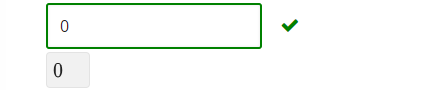

На какой товар была произведена отмена?
В качестве ответа запишите название этого товара (Name).

In [142]:
orders_products[orders_products['Отменен'] == 'Да']['Name']

6    Носки беговые Camino
Name: Name, dtype: object

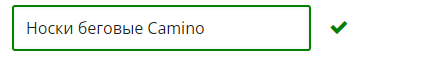

Какой покупатель принёс наибольшую суммарную прибыль интернет-магазину за указанный период?
В ответ запишите идентификатор этого покупателя (ID Покупателя).
Прибыль состоит только из оплаченных заказов и рассчитывается как количество купленного товара, умноженное на его цену.

In [143]:
orders_products['Profit'] = orders_products['Price'] * orders_products['Количество'] 
orders_products[orders_products['Оплачен'] == 'Да'].groupby('ID Покупателя')['Profit'].sum().sort_values(ascending=False)

ID Покупателя
7    17096.0
5    13043.0
8     1344.0
1        0.0
Name: Profit, dtype: float64

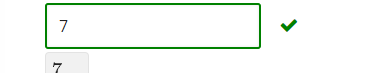